In [42]:
import pandas as pd
womens_df = pd.read_csv('/Users/anikamisra/Desktop/personal-projects/pink-tax/gymshark/womens_df_clean.csv')
mens_df = pd.read_csv('/Users/anikamisra/Desktop/personal-projects/pink-tax/gymshark/mens_df_clean.csv')

In [43]:
womens_df.head()

,Product,Price,Specific Category,General Category
0,Silicone Grip Lifting Straps,$16,other,other
1,Vital Seamless 2.0 Leggings,$54,Leggings,Pants
2,Crew Socks3pk,$16,Socks 3-pack,Socks 3pk
3,Crew Socks5pk,$26,Socks 5-pack,Socks 5pk
4,Strong Girl Lifting Club Oversized Graphic Crew,$42,Crew,Outerwear


In [44]:
print("Womens specific categories: ", womens_df['Specific Category'].unique())
print("\nMens specific categories: ", mens_df['Specific Category'].unique())

Womens specific categories:  ['other' 'Leggings' 'Socks 3-pack' 'Socks 5-pack' 'Crew' 'Shorts' 'Bra'
 'Bag' 'Other top' 'T-shirt' 'Sweatpants' 'Crop top' 'Tank']

Mens specific categories:  ['T-shirt' 'Tank' 'Shorts' 'Sweatpants' 'Hoodie' 'Underwear' 'Crew']


In [45]:
# need to add this to the cleaning step 
womens_df['Price'] = womens_df['Price'].str.replace('$', '')
womens_df['Price'] = womens_df['Price'].astype(float)
mens_df['Price'] = mens_df['Price'].str.replace('$', '')
mens_df['Price'] = mens_df['Price'].astype(float)

In [48]:
overlap_categories = set(womens_df['Specific Category'].unique()) & set(mens_df['Specific Category'].unique())
print(overlap_categories)

results_df = pd.DataFrame(columns = ['Specific Category', 
                                     'Womens avg price', 
                                     'Mens avg price',
                                    '% difference (women vs men)', 
                                    'No. of items (women)', 
                                    'No. of items (men)'])

for category in overlap_categories: 
    w_item = womens_df[womens_df['Specific Category'] == category]
    m_item = mens_df[mens_df['Specific Category'] == category]
    w_avg_price = w_item['Price'].mean()
    m_avg_price = m_item['Price'].mean()
    no_of_items_w = w_item.shape[0]
    no_of_items_m = m_item.shape[0]

    percent_difference = str((abs(w_avg_price - m_avg_price) / m_avg_price * 100).round(2))
    more_or_less = "more" if w_avg_price > m_avg_price else "less"
    
    new_data = pd.DataFrame({
        'Specific Category': [category],
        'Womens avg price': [w_avg_price],
        'Mens avg price': [m_avg_price],
        '% difference (women vs men)': [f"{percent_difference}% {more_or_less}"],
        'No. of items (women)': [no_of_items_w],
        'No. of items (men)': [no_of_items_m]
    })

    # Concatenate the new data to results_df
    results_df = pd.concat([results_df, new_data], ignore_index=True)

results_df['Womens avg price'] = results_df['Womens avg price'].round(2)
results_df['Mens avg price'] = results_df['Mens avg price'].round(2)

results_df

{'Crew', 'Sweatpants', 'T-shirt', 'Tank', 'Shorts'}


/var/folders/f2/btr2krsx7hx6jcjm7m5dn87m0000gn/T/ipykernel_9609/443035012.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_data], ignore_index=True)


,Specific Category,Womens avg price,Mens avg price,% difference (women vs men),No. of items (women),No. of items (men)
0,Crew,42.00,30.00,40.0% more,16,16
1,Sweatpants,42.67,40.00,6.67% more,48,64
2,T-shirt,36.80,28.53,29.0% more,80,304
3,Tank,36.00,24.00,50.0% more,32,96
4,Shorts,33.98,29.55,15.0% more,176,384


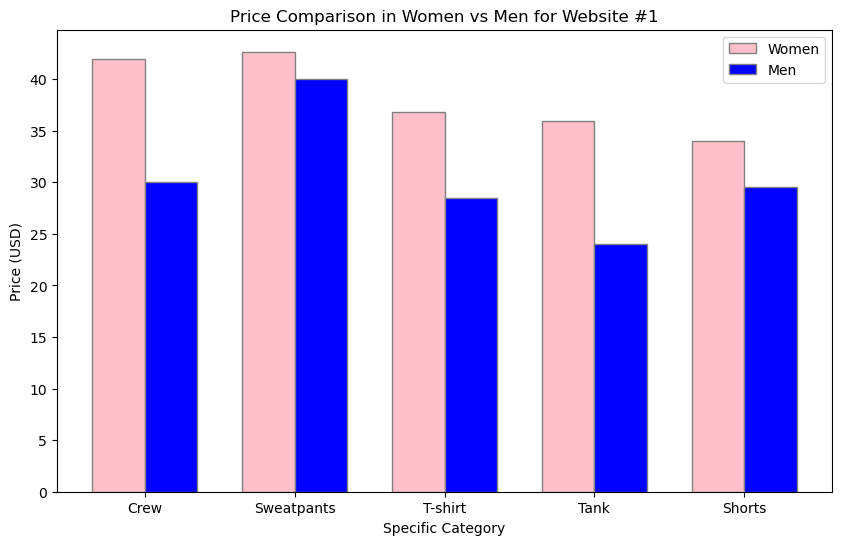

In [52]:
import matplotlib.pyplot as plt
import numpy as np

categories = results_df['Specific Category'].values
womens_prices = results_df['Womens avg price'].values
mens_prices = results_df['Mens avg price'].values

bar_width = 0.35
womens_positions = np.arange(len(categories))
mens_positions = [x + bar_width for x in womens_positions]

plt.figure(figsize=(10, 6))
plt.bar(womens_positions, womens_prices, color='pink', width=bar_width, edgecolor='grey', label='Women')
plt.bar(mens_positions, mens_prices, color='blue', width=bar_width, edgecolor='grey', label='Men')

plt.title('Price Comparison in Women vs Men for Website #1')
plt.xlabel('Specific Category')
plt.ylabel('Price (USD)')

plt.xticks([r + bar_width / 2 for r in range(len(womens_prices))], categories)

plt.legend()
plt.show()